# Problem 2. (Derivative-Free Optimization Methods).
This assignment explores Nelder-Mead, Simulated Annealing, and Covariance Matrix Adaptation Evolution Strategy (CMA-ES).

You will implement these optimization techniques and compare their performance on different objective functions.
Implement or use available libraries to apply the following optimization techniques:
* Nelder-Mead (Simplex Method)
* Simulated Annealing
* CMA-ES (Covariance Matrix Adaptation Evolution Strategy)

In [ ]:
#installation of important library
!pip install cma

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.5/283.5 kB 4.1 MB/s eta 0:00:00


In [ ]:
#import all the needed libraries
import numpy as np
import scipy.optimize as opt
import cma
import matplotlib.pyplot as plt

# Task 1: Benchmarking on Test Functions (1 mark)

1. Optimize the following benchmark functions:

*  Rosenbrock function
* Rastrigin function
* Ackley function

In [ ]:
#defining rossenbrock function
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

#defining rastrigin function
def rastrigin(x):
    d = len(x) #d-dimensional vector x
    return 10 * d + sum(xi**2 - 10 * np.cos(2 * np.pi * xi) for xi in x)

#defining ackley function
def ackley(x):
    x = np.asarray(x, dtype=float) #converting vector x into numpy array with float datatype
    d = len(x) #d dimensional vector x
    t1 = -20 * np.exp(-0.2 * np.sqrt(np.sum(np.square(x)) / d))
    t2 = -np.exp(np.sum(np.cos(2 * np.pi * x)) / d)
    return t1 + t2 + 20 + np.e

In [ ]:
#nelder-mead optimization technique (simplex method)
def optimize_nelder_mead(func, x0):
    history = [] #to keep track of all the values that x takes
    callback = lambda xk: history.append(func(xk))

    result = opt.minimize(func, x0, method='Nelder-Mead', callback=callback)

    return result.x, result.fun, result.nit, history

#where reusult.x gives optimal value of x which minimizes the function
#result.fun gives minimum value of that function for given optimal x
#result.nit gives number of iterations taken to reach to the solution

#function for calculating simulated annealing optimization technique
def optimize_simulated_annealing(func, x0):
    history = []

    def callback(x, f, context):
        history.append(f)

    result = opt.dual_annealing(func, bounds=[(-5, 5)]*len(x0), callback=callback)

    return result.x, result.fun, result.nit, history

#function to calculate CMA-ES (Covariance Matrix Adaptation Evolution Strategy) optimization technique
def optimize_cma_es(func, x0):
    history = []

    #function to store the best value
    def tracker(es):
        history.append(es.best.f)

    #initializes the CMA-ES optimizer with x0 values and with step size of 0.5
    es = cma.CMAEvolutionStrategy(x0, 0.5)
    #run the optimize function to get the minimum value of the given function
    es.optimize(func, callback=tracker)

    return es.result.xbest, es.result.fbest, es.result.iterations, history
#where es.result.xbest stores optimal value of x which minimizes the function
#es.result.fbest stores the optimal value of the function at given x
#es.result.iterations stores the number of iterations taken to get that x value

2. Compare convergence speed and accuracy of each method on these functions.


Optimizing Rosenbrock function...

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=725294, Sat Mar 22 18:56:49 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 3.246778123248826e+00 1.0e+00 5.43e-01  5e-01  6e-01 0:00.0
    2     12 1.747789348482565e+00 1.2e+00 6.46e-01  7e-01  7e-01 0:00.0
    3     18 1.339023724967622e+00 1.5e+00 6.31e-01  6e-01  7e-01 0:00.0
  100    600 5.474696113017791e-11 4.7e+01 3.11e-03  9e-06  2e-05 0:00.6
  125    750 6.929194701843522e-14 5.2e+01 3.49e-04  2e-07  3e-07 0:00.7


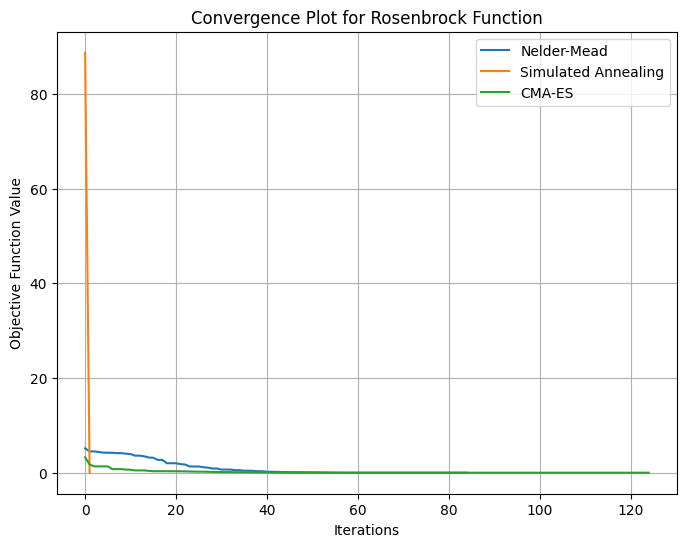


Optimizing Rastrigin function...

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=791930, Sat Mar 22 18:56:52 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 2.170369174061452e+01 1.0e+00 6.21e-01  6e-01  8e-01 0:00.0
    2     12 2.409859942471353e+01 1.7e+00 5.78e-01  6e-01  7e-01 0:00.0
    3     18 3.394111582251833e+01 1.6e+00 8.08e-01  8e-01  1e+00 0:00.0
   94    564 7.959662381108181e+00 1.7e+00 7.86e-06  5e-09  5e-09 0:00.5


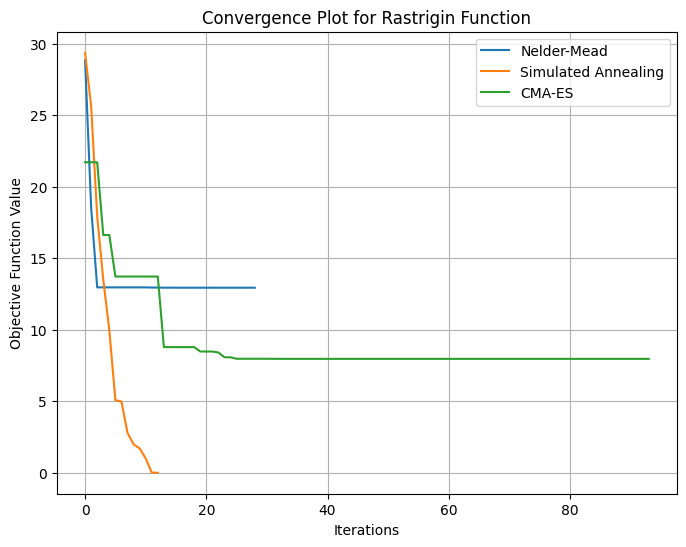


Optimizing Ackley function...

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=828940, Sat Mar 22 18:56:55 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 9.365919164970842e+00 1.0e+00 3.68e-01  3e-01  3e-01 0:00.0
    2     12 9.623209833190655e+00 1.1e+00 2.87e-01  2e-01  2e-01 0:00.0
    3     18 8.855403637183246e+00 1.2e+00 2.44e-01  2e-01  2e-01 0:00.0
   75    450 8.813151774046894e+00 1.5e+00 1.49e-05  1e-08  2e-08 0:00.3


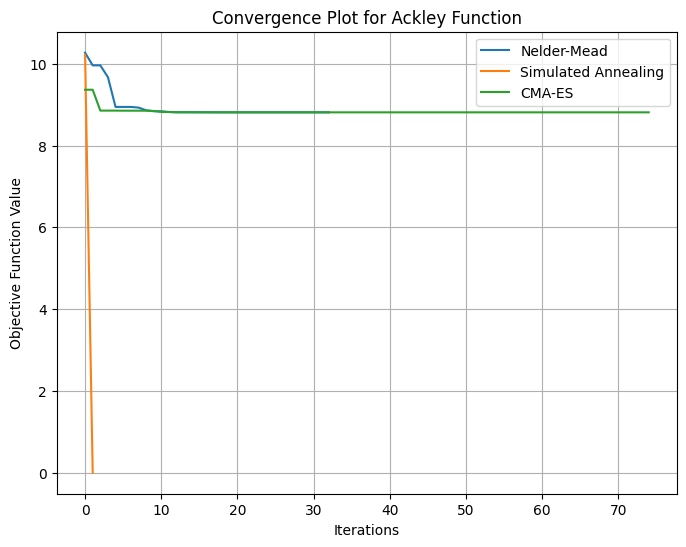


Summary of Optimization Results:
      Function               Method  Final Function Value  Iterations
0  Rosenbrock          Nelder-Mead          8.177661e-10          85
1  Rosenbrock  Simulated Annealing          8.823011e-12        1000
2  Rosenbrock               CMA-ES          1.666138e-14         125
3   Rastrigin          Nelder-Mead          1.293443e+01          29
4   Rastrigin  Simulated Annealing          7.105427e-15        1000
5   Rastrigin               CMA-ES          7.959662e+00          94
6      Ackley          Nelder-Mead          8.813152e+00          33
7      Ackley  Simulated Annealing          5.341843e-09        1000
8      Ackley               CMA-ES          8.813152e+00          75


In [ ]:
import pandas as pd

methods = {
    "Nelder-Mead": optimize_nelder_mead,
    "Simulated Annealing": optimize_simulated_annealing,
    "CMA-ES": optimize_cma_es
}

functions = {
    "Rosenbrock": rosenbrock,
    "Rastrigin": rastrigin,
    "Ackley": ackley
}

# Set Initial Guesses for Each Function to make convergence process fast
x0_dict = {
    "Rosenbrock": np.array([-1.2, 1.0]),
    "Rastrigin": np.random.uniform(-5, 5, size=(2,)),
    "Ackley": np.random.uniform(-5, 5, size=(2,))
}

#Store the results
results = {func_name: {} for func_name in functions}
summary = []

# Optimization Loop
for fun_name, func in functions.items():
    print(f"\nOptimizing {fun_name} function...\n")
    plt.figure(figsize=(8, 6))
    x0 = x0_dict[fun_name]

    for method_name, method in methods.items():
        x_opt, f_opt, n_iterations, history = method(func, x0)
        results[fun_name][method_name] = (x_opt, f_opt, n_iterations, history)

        # Append to summary
        summary.append([fun_name, method_name, f_opt, n_iterations])

        # Plot convergence
        plt.plot(history, label=method_name)

    plt.title(f"Convergence Plot for {fun_name} Function")
    plt.xlabel("Iterations")
    plt.ylabel("Objective Function Value")
    plt.legend()
    plt.grid()
    plt.show()

# Convert to DataFrame for Better Readability
summary_df = pd.DataFrame(summary, columns=["Function", "Method", "Final Function Value", "Iterations"])
print("\nSummary of Optimization Results:\n", summary_df)


contour plots for these methods and functions

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=727152, Sat Mar 22 18:57:01 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 3.412532658955302e+01 1.0e+00 4.30e-01  4e-01  4e-01 0:00.0
    2     12 1.040805784325155e+01 1.2e+00 4.12e-01  4e-01  4e-01 0:00.0
    3     18 6.372791416883880e+01 1.2e+00 4.68e-01  4e-01  4e-01 0:00.0
  100    600 1.021280466667514e-01 1.0e+01 5.56e+00  1e-01  1e-01 0:00.5
  180   1080 8.224674758991237e-16 4.5e+01 2.59e-03  8e-08  2e-07 0:01.0
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=851142, Sat Mar 22 18:57:04 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 9.894784883629510e+00 1.0e+00 4.54e-01  4e-01  4e-01 0:00.0
    2     12 1.707342559071479e+01 1.1e+00 5.94e-01  6e-01  7e-01 0:00.0
    3     18 1.560678963882730e+01 1.8e+00 5.71e-01  6e-01  6e-01 0:00.0
   91    546 1.989918114186594e+00 1.5e+00 1.27e-05  7e-09  8e-09 0:00.4
(3_w,6)-aCMA-ES (mu

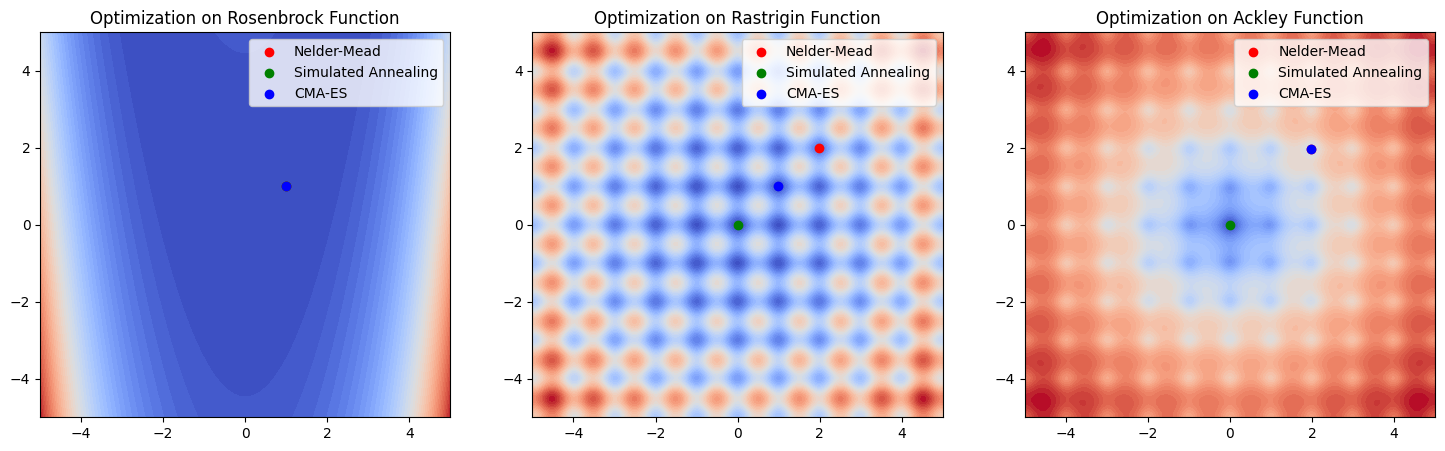

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, dual_annealing
from cma import CMAEvolutionStrategy

# Optimization methods
def optimize_nelder_mead(func, x0):
    result = minimize(func, x0, method='Nelder-Mead', options={'disp': False, 'maxiter': 1000})
    return result
    #returning result as the object which will be contains all the needed attributes

def optimize_simulated_annealing(func, bounds):
    result = dual_annealing(func, bounds)
    return result

def optimize_cma_es(func, x0):
    es = CMAEvolutionStrategy(x0, 0.5)
    es.optimize(func)
    return es

# Function details with function name, initial guess and the search space limits
functions = {
    "Rosenbrock": (rosenbrock, [-2, 2], [(-5, 5), (-5, 5)]),
    "Rastrigin": (rastrigin, [2, 2], [(-5, 5), (-5, 5)]),
    "Ackley": (ackley, [2, 2], [(-5, 5), (-5, 5)])
}

# Store results
opt_results = {}

for name, (func, x0, bounds) in functions.items():
    nelder_result = optimize_nelder_mead(func, x0)
    sa_result = optimize_simulated_annealing(func, bounds)
    cma_result = optimize_cma_es(func, x0)
    opt_results[name] = (nelder_result, sa_result, cma_result)

# Generate Plots for Each Function
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, (func, x0, bounds)) in zip(axes, functions.items()):
    x = np.linspace(bounds[0][0], bounds[0][1], 400)
    y = np.linspace(bounds[1][0], bounds[1][1], 400)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[func([xx, yy]) for xx, yy in zip(X_row, Y_row)] for X_row, Y_row in zip(X, Y)])

    # Contour Plot
    ax.contourf(X, Y, Z, levels=50, cmap='coolwarm')

    # Get optimization results
    nelder_result, sa_result, cma_result = opt_results[name]

    # Scatter the optimal points
    ax.scatter(*nelder_result.x, color='red', label='Nelder-Mead')
    ax.scatter(*sa_result.x, color='green', label='Simulated Annealing')
    ax.scatter(*cma_result.result[0], color='blue', label='CMA-ES')

    ax.legend()
    ax.set_title(f"Optimization on {name} Function")

plt.show()


# Task 2: Hyperparameter Tuning in Machine Learning (2 marks)

1. Apply the three optimization methods to tune hyperparameters for a machine learning model:

* Consider a Support Vector Machine (SVM) for classification on the MNIST dataset.
* Optimize hyperparameters such as kernel type, regularization parameter (C), and gamma.
* Compare the test accuracy obtained using each optimization technique.

2. Analyze and compare the efficiency of each method in terms of:

* Number of function evaluations required to reach optimal hyperparameters.
* Performance stability over multiple runs.
* Final classification accuracy.

In [ ]:
#import all needed libraries
import numpy as np
import pandas as pd
import time
import cma
import scipy.optimize as opt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load and preprocess MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data.astype(np.float64), mnist.target.astype(int)  # Convert X to float64

# Normalize pixel values to [0,1]
X = X/ 255.0

#Reducing to first 5000 datapoints for faster optimization
X_train, X_test, y_train, y_test = train_test_split(X[:5000], y[:5000], test_size=0.2, stratify=y[:5000], random_state=42)

# Track optimization history
optimization_history = {"Nelder-Mead": [], "Simulated Annealing": [], "CMA-ES": []}

def evaluate_svm(params, method_name=None, iteration=None):
    kernel_choice = int(params[0])  # Convert to int (0 = linear, 1 = rbf)
    C = 10 ** params[1]  # Convert back to original scale
    gamma = 10 ** params[2] if kernel_choice == 1 else 'scale'  # Only used for 'rbf'

    kernel_options = ['linear', 'rbf']
    kernel = kernel_options[kernel_choice]

    # Train SVM
    svm = SVC(kernel=kernel, C=C, gamma=gamma)
    svm.fit(X_train, y_train)

    # Predict and compute accuracy
    accuracy = accuracy_score(y_test, svm.predict(X_test))

    # Store accuracy at each iteration
    if method_name is not None and iteration is not None:
        optimization_history[method_name].append((iteration, accuracy))

    return 1 - accuracy  # Minimize 1 - accuracy


def optimize_nelder_mead():
    x0 = [0, 1, -3]  # Initial values for kernel, C, gamma

    def callback(xk):
        iteration = len(optimization_history["Nelder-Mead"])
        evaluate_svm(xk, "Nelder-Mead", iteration)

    result = opt.minimize(evaluate_svm, x0, method='Nelder-Mead', callback=callback, options={'maxiter': 30})
    return result.x, 1 - result.fun, result.nfev


def optimize_simulated_annealing():
    bounds = [(0, 1), (-2, 2), (-4, 0)]  # Kernel (0=linear, 1=rbf), log10(C), log10(gamma)

    def callback(x, f, context):
        iteration = len(optimization_history["Simulated Annealing"])
        evaluate_svm(x, "Simulated Annealing", iteration)

    result = opt.dual_annealing(evaluate_svm, bounds=bounds, maxiter=20, callback=callback)
    return result.x, 1 - result.fun, result.nfev


def optimize_cma_es():
    es = cma.CMAEvolutionStrategy([0.5, 0, -2], 0.5, {'bounds': [[0, -2, -4], [1, 2, 0]], 'maxiter': 10})

    def callback(es_instance):
        iteration = len(optimization_history["CMA-ES"])
        evaluate_svm(es_instance.result.xbest, "CMA-ES", iteration)

    es.optimize(evaluate_svm, callback=callback)
    return es.result.xbest, 1 - es.result.fbest, es.result.evaluations


methods = {
    "Nelder-Mead": optimize_nelder_mead,
    "Simulated Annealing": optimize_simulated_annealing,
    "CMA-ES": optimize_cma_es
}

results = []
for method_name, method in methods.items():
    print(f"\nRunning {method_name}...\n")
    start_time = time.time()

    best_params, best_accuracy, n_evals = method()

    time = time.time() - start_time
    results.append([method_name, best_params, best_accuracy, n_evals, time])

# Convert results to DataFrame
summary_df = pd.DataFrame(results, columns=["Method", "Best Params", "Final Accuracy", "Function Evaluations", "Time (s)"])
print(summary_df)




Running Nelder-Mead...


Running Simulated Annealing...


Running CMA-ES...

(3_w,7)-aCMA-ES (mu_w=2.3,w_1=58%) in dimension 3 (seed=786797, Sat Mar 22 19:04:34 2025)


/usr/local/lib/python3.11/dist-packages/cma/evolution_strategy.py:1244: UserWarning: Sampling standard deviation i=0 at iteration 0 change by 0.6666666666666666 to stds[0]=0.3333333333333333
  warnings.warn("Sampling standard deviation i={0} at iteration {1}"


Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      7 6.200000000000006e-02 1.0e+00 5.53e-01  3e-01  7e-01 0:12.4
    2     14 5.700000000000005e-02 1.4e+00 7.23e-01  3e-01  1e+00 0:25.3
    3     21 5.800000000000005e-02 1.9e+00 9.98e-01  3e-01  1e+00 0:38.7
    4     28 5.800000000000005e-02 2.0e+00 8.94e-01  3e-01  1e+00 0:52.4
    5     35 5.600000000000005e-02 1.8e+00 8.20e-01  3e-01  9e-01 1:05.5
    6     42 5.500000000000005e-02 1.7e+00 9.48e-01  3e-01  1e+00 1:18.5
    7     49 5.800000000000005e-02 1.6e+00 1.06e+00  3e-01  9e-01 1:31.5
    8     56 5.700000000000005e-02 1.5e+00 1.14e+00  3e-01  1e+00 1:45.9
    9     63 5.500000000000005e-02 1.6e+00 1.04e+00  3e-01  9e-01 2:00.3
   10     70 5.600000000000005e-02 1.6e+00 1.10e+00  3e-01  1e+00 2:14.4
                Method                                        Best Params  \
0          Nelder-Mead                                   [0.0, 1.0, -3.0]   
1  Simulated Annealing  [0.9045381397008896,

# Task 3: Performance Analysis and Visualization (2 marks)

1. Plot the optimization trajectories for each method in 2D and 3D where applicable.

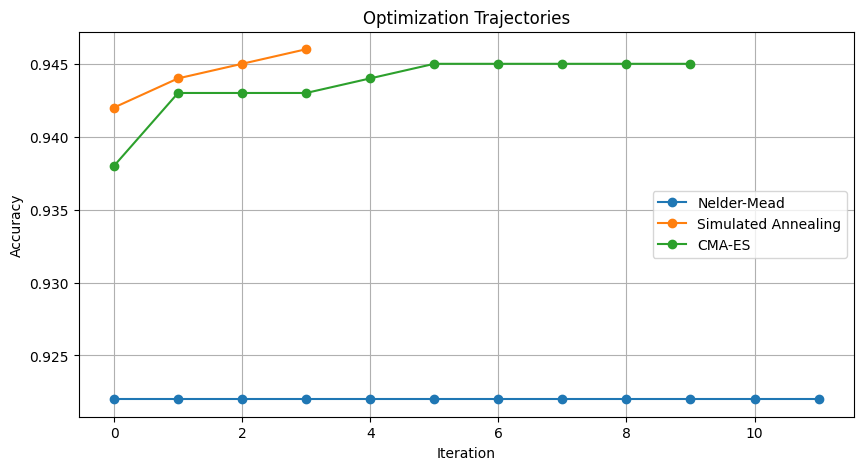

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Optimization Trajectories (Accuracy vs Iterations)
plt.figure(figsize=(10, 5))
for method in optimization_history.keys():
    iterations, accs = zip(*optimization_history[method])
    plt.plot(iterations, accs, label=method, marker='o')

plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Optimization Trajectories")
plt.legend()
plt.grid()
plt.show()


2. Compare the number of function evaluations required to reach the minimum.

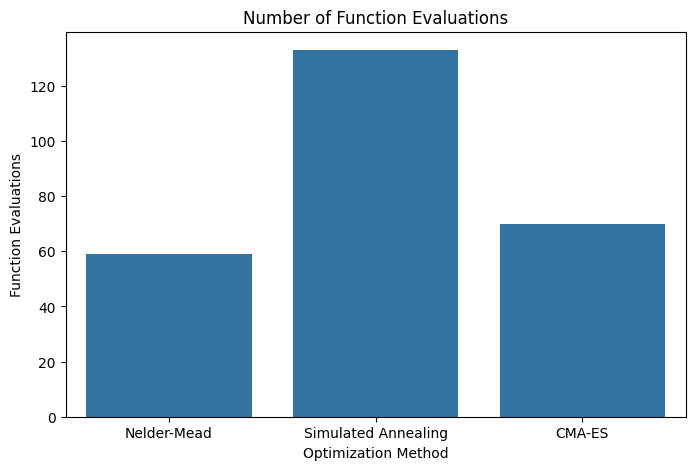

In [ ]:
#bar plot for these methods
plt.figure(figsize=(8, 5))
sns.barplot(x=summary_df["Method"], y=summary_df["Function Evaluations"])
plt.xlabel("Optimization Method")
plt.ylabel("Function Evaluations")
plt.title("Number of Function Evaluations")
plt.show()


3. Analyze robustness to different initial conditions.

/usr/local/lib/python3.11/dist-packages/cma/evolution_strategy.py:1244: UserWarning: Sampling standard deviation i=0 at iteration 0 change by 0.6666666666666666 to stds[0]=0.3333333333333333
  warnings.warn("Sampling standard deviation i={0} at iteration {1}"


(3_w,7)-aCMA-ES (mu_w=2.3,w_1=58%) in dimension 3 (seed=750839, Sat Mar 22 14:43:32 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      7 5.500000000000005e-02 1.0e+00 6.92e-01  3e-01  8e-01 0:11.7
    2     14 5.400000000000005e-02 1.2e+00 7.97e-01  3e-01  8e-01 0:24.3
    3     21 5.700000000000005e-02 1.2e+00 6.74e-01  3e-01  7e-01 0:36.7
    4     28 5.500000000000005e-02 1.5e+00 6.27e-01  3e-01  7e-01 0:49.0
    5     35 5.400000000000005e-02 1.7e+00 6.44e-01  3e-01  7e-01 1:01.9
    6     42 5.400000000000005e-02 2.1e+00 5.47e-01  2e-01  5e-01 1:14.7
    7     49 5.400000000000005e-02 2.3e+00 4.44e-01  2e-01  5e-01 1:27.2
    8     56 5.400000000000005e-02 2.8e+00 5.49e-01  2e-01  6e-01 1:39.9
    9     63 5.400000000000005e-02 3.3e+00 4.76e-01  2e-01  5e-01 1:52.2
   10     70 5.400000000000005e-02 3.5e+00 3.47e-01  1e-01  3e-01 2:04.8


/usr/local/lib/python3.11/dist-packages/cma/evolution_strategy.py:1244: UserWarning: Sampling standard deviation i=0 at iteration 0 change by 0.6666666666666666 to stds[0]=0.3333333333333333
  warnings.warn("Sampling standard deviation i={0} at iteration {1}"


(3_w,7)-aCMA-ES (mu_w=2.3,w_1=58%) in dimension 3 (seed=795989, Sat Mar 22 14:51:29 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      7 6.799999999999995e-02 1.0e+00 4.69e-01  3e-01  5e-01 0:11.5
    2     14 6.000000000000005e-02 1.4e+00 4.92e-01  3e-01  5e-01 0:23.2
    3     21 5.700000000000005e-02 1.4e+00 5.80e-01  3e-01  5e-01 0:34.8
    4     28 5.700000000000005e-02 1.6e+00 6.02e-01  3e-01  6e-01 0:46.5
    5     35 5.500000000000005e-02 1.4e+00 5.50e-01  3e-01  5e-01 0:59.4
    6     42 5.400000000000005e-02 1.6e+00 5.30e-01  3e-01  5e-01 1:11.6
    7     49 5.600000000000005e-02 1.8e+00 4.27e-01  2e-01  3e-01 1:24.6
    8     56 5.400000000000005e-02 2.1e+00 4.96e-01  3e-01  4e-01 1:37.7
    9     63 5.600000000000005e-02 2.9e+00 4.48e-01  3e-01  3e-01 1:50.9
   10     70 5.500000000000005e-02 3.1e+00 4.41e-01  3e-01  3e-01 2:02.7


/usr/local/lib/python3.11/dist-packages/cma/evolution_strategy.py:1244: UserWarning: Sampling standard deviation i=0 at iteration 0 change by 0.6666666666666666 to stds[0]=0.3333333333333333
  warnings.warn("Sampling standard deviation i={0} at iteration {1}"


(3_w,7)-aCMA-ES (mu_w=2.3,w_1=58%) in dimension 3 (seed=824884, Sat Mar 22 14:59:27 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      7 6.299999999999994e-02 1.0e+00 5.39e-01  3e-01  6e-01 0:11.5
    2     14 5.700000000000005e-02 1.4e+00 6.56e-01  3e-01  8e-01 0:24.2
    3     21 5.400000000000005e-02 1.7e+00 6.59e-01  3e-01  7e-01 0:36.5
    4     28 5.700000000000005e-02 1.5e+00 7.00e-01  3e-01  7e-01 0:49.6
    5     35 5.400000000000005e-02 1.3e+00 7.19e-01  3e-01  7e-01 1:02.9
    6     42 5.800000000000005e-02 1.4e+00 8.38e-01  3e-01  1e+00 1:15.3
    7     49 5.300000000000005e-02 1.9e+00 9.06e-01  3e-01  1e+00 1:27.6
    8     56 5.400000000000005e-02 2.0e+00 1.01e+00  3e-01  1e+00 1:40.5
    9     63 5.400000000000005e-02 1.8e+00 1.34e+00  3e-01  1e+00 1:52.3
   10     70 5.400000000000005e-02 2.7e+00 1.20e+00  3e-01  1e+00 2:04.9


/usr/local/lib/python3.11/dist-packages/cma/evolution_strategy.py:1244: UserWarning: Sampling standard deviation i=0 at iteration 0 change by 0.6666666666666666 to stds[0]=0.3333333333333333
  warnings.warn("Sampling standard deviation i={0} at iteration {1}"


(3_w,7)-aCMA-ES (mu_w=2.3,w_1=58%) in dimension 3 (seed=726543, Sat Mar 22 15:07:28 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      7 5.900000000000005e-02 1.0e+00 6.38e-01  3e-01  7e-01 0:11.5
    2     14 6.000000000000005e-02 1.4e+00 9.13e-01  3e-01  1e+00 0:23.1
    3     21 5.900000000000005e-02 1.6e+00 8.21e-01  3e-01  9e-01 0:35.8
    4     28 5.800000000000005e-02 1.9e+00 7.48e-01  3e-01  9e-01 0:48.0
    5     35 5.400000000000005e-02 2.4e+00 8.07e-01  3e-01  1e+00 0:59.8
    6     42 5.500000000000005e-02 2.9e+00 8.46e-01  3e-01  1e+00 1:12.2
    7     49 5.500000000000005e-02 3.1e+00 7.18e-01  3e-01  8e-01 1:25.3
    8     56 5.400000000000005e-02 3.6e+00 6.63e-01  3e-01  7e-01 1:37.2
    9     63 5.500000000000005e-02 4.0e+00 5.85e-01  2e-01  6e-01 1:49.8
   10     70 5.400000000000005e-02 4.1e+00 5.09e-01  2e-01  5e-01 2:01.7


/usr/local/lib/python3.11/dist-packages/cma/evolution_strategy.py:1244: UserWarning: Sampling standard deviation i=0 at iteration 0 change by 0.6666666666666666 to stds[0]=0.3333333333333333
  warnings.warn("Sampling standard deviation i={0} at iteration {1}"


(3_w,7)-aCMA-ES (mu_w=2.3,w_1=58%) in dimension 3 (seed=787607, Sat Mar 22 15:15:23 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      7 6.899999999999995e-02 1.0e+00 5.21e-01  3e-01  6e-01 0:11.5
    2     14 5.700000000000005e-02 1.4e+00 6.23e-01  3e-01  8e-01 0:23.0
    3     21 5.800000000000005e-02 1.8e+00 6.50e-01  3e-01  8e-01 0:35.0
    4     28 5.700000000000005e-02 1.8e+00 5.97e-01  3e-01  7e-01 0:47.7
    5     35 6.100000000000005e-02 1.8e+00 6.19e-01  3e-01  7e-01 1:00.6
    6     42 5.400000000000005e-02 1.5e+00 7.76e-01  3e-01  8e-01 1:14.7
    7     49 5.500000000000005e-02 1.7e+00 1.05e+00  3e-01  1e+00 1:26.7
    8     56 5.400000000000005e-02 2.1e+00 9.72e-01  3e-01  9e-01 1:39.4
    9     63 5.600000000000005e-02 1.8e+00 8.42e-01  3e-01  8e-01 1:51.5
   10     70 5.700000000000005e-02 2.0e+00 7.29e-01  2e-01  6e-01 2:04.4


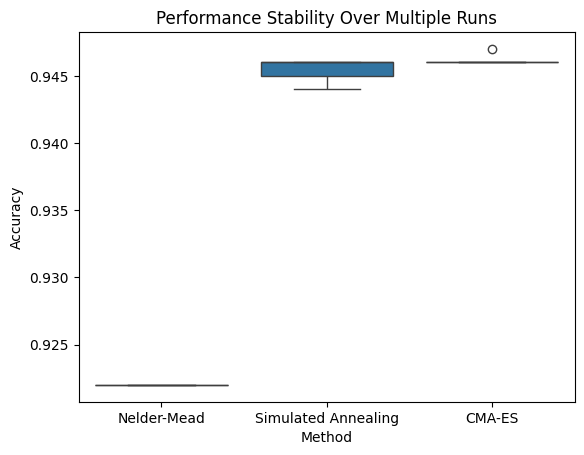

In [ ]:
#box plot
stability_results = []
for _ in range(5):  # Run 5 times
    for method_name, method in methods.items():
        k, accuracy, l = method()
        stability_results.append([method_name, accuracy])

stability_df = pd.DataFrame(stability_results, columns=["Method", "Accuracy"])
sns.boxplot(x="Method", y="Accuracy", data=stability_df)
plt.title("Performance Stability Over Multiple Runs")
plt.show()


4. Visualize the hyperparameter search landscape and final model performance.

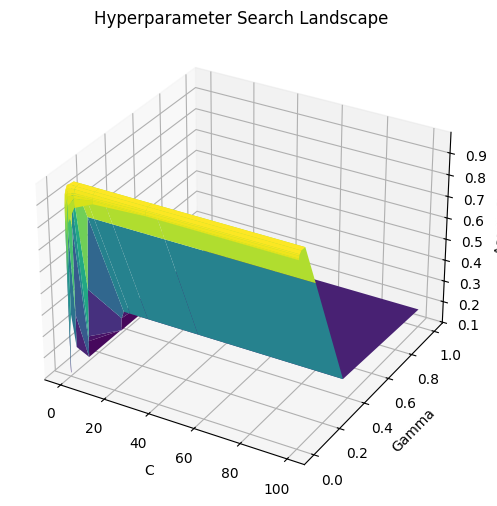

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

C_values = np.logspace(-2, 2, 10)  # Log scale for C
gamma_values = np.logspace(-4, 0, 10)  # Log scale for gamma
acc_matrix = np.zeros((10, 10))

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        paras = [1, np.log10(C), np.log10(gamma)]  # Use RBF kernel
        acc_matrix[i, j] = 1 - evaluate_svm(paras)

# Plot the Surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
C_mesh, gamma_mesh = np.meshgrid(C_values, gamma_values)
ax.plot_surface(C_mesh, gamma_mesh, acc_matrix.T, cmap="viridis")

ax.set_xlabel("C")
ax.set_ylabel("Gamma")
ax.set_zlabel("Accuracy")
ax.set_title("Hyperparameter Search Landscape")
plt.show()
